In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
pd.options.display.float_format = '{:,.2f}'.format
pd.set_option('display.max_columns', None)

In [3]:
path_data = '../data/'

In [5]:
# загружаем датасеты
df_febr = pd.read_csv(path_data + 'Февраль_с_назв_тов.csv', sep=';')
df_march = pd.read_csv(path_data + 'Март_с_назв_тов.csv', sep=';')
df_apr = pd.read_csv(path_data + 'Апрель_с_назв_тов.csv', sep=';')
df_may = pd.read_csv(path_data + 'Май_с_назв_тов.csv', sep=';')

df_shop = pd.read_csv(path_data + 'svao_info.csv', sep=';')
df_projects = pd.read_csv(path_data + 'projects for TT.csv', sep=';')
#df_ostatki = pd.read_csv(path_data + '2_ost.csv', sep=';')

**Проверка на пропуски**

In [6]:
df_febr.isna().sum()

CheckUID            0
id_tt_cl            0
id_tov_cl           0
Price_retail        5
Quantity            0
BasePrice           0
BaseSum             0
date_ch             0
time_ch             0
order_type          0
name_tov        62452
name_gr         62458
name_gr2        62458
dtype: int64

In [7]:
# нет данных по некоторым товарам (наименования и категории)
df_march.isna().sum()

CheckUID            0
id_tt_cl            0
id_tov_cl           0
Price_retail       39
Quantity            0
BasePrice           0
BaseSum             0
date_ch             0
time_ch             0
order_type          0
name_tov        14164
name_gr         14166
name_gr2        14166
dtype: int64

**Добавим к каждой точке дополнительные проекты**

In [8]:
# Словарь проектов по каждой торговой точке
projects = {}

id_tt_project =  df_projects['id_TT'].to_list()

for tt in id_tt_project:
    projects[tt] = df_projects[df_projects['id_TT'] == tt]['project_name'].to_list()
    

In [9]:
df_shop['project_name'] = df_shop['id_tt'].apply(lambda x: projects[x] if x in projects.keys() else [])

**Добавим в данные по продажам тип магазина - ВкусВилл или Шмель**

In [10]:
df_march.head(2)

,CheckUID,id_tt_cl,id_tov_cl,Price_retail,Quantity,BasePrice,BaseSum,date_ch,time_ch,order_type,name_tov,name_gr,name_gr2
0,374BC969-4D99-EC11-9064-005056A7A8DF,10864,52,119.09,1.00,119.09,119.09,2022-03-01,13:29:40,offline,Сметана 25%,Молочная Продукция,Сметана
1,6A9DF7ED-7899-EC11-9064-005056A7A8DF,10864,52,119.09,1.00,119.09,119.09,2022-03-01,18:45:00,offline,Сметана 25%,Молочная Продукция,Сметана


In [11]:
shop_type = {}

for i in range(df_shop.shape[0]):
    shop_type[df_shop['id_tt'].iloc[i]] = df_shop['format'].iloc[i]

df_febr['format'] = df_febr['id_tt_cl'].apply(lambda x: shop_type[x])    
df_march['format'] = df_march['id_tt_cl'].apply(lambda x: shop_type[x])
df_apr['format'] = df_apr['id_tt_cl'].apply(lambda x: shop_type[x])
df_may['format'] = df_may['id_tt_cl'].apply(lambda x: shop_type[x])

**Посмотрим динамику выручки по месяцам** 

In [12]:
febr_gr_vv = df_febr[df_febr['format'] == 'ВкусВилл'].groupby(['id_tt_cl'])['Quantity', 'BaseSum'].sum()
febr_gr_sh = df_febr[df_febr['format'] == 'Шмель'].groupby(['id_tt_cl'])['Quantity', 'BaseSum'].sum()

march_gr_vv = df_march[df_march['format'] == 'ВкусВилл'].groupby(['id_tt_cl'])['Quantity', 'BaseSum'].sum()
march_gr_sh = df_march[df_march['format'] == 'Шмель'].groupby(['id_tt_cl'])['Quantity', 'BaseSum'].sum()

apr_gr_vv = df_apr[df_apr['format'] == 'ВкусВилл'].groupby(['id_tt_cl'])['Quantity', 'BaseSum'].sum()
apr_gr_sh = df_apr[df_apr['format'] == 'Шмель'].groupby(['id_tt_cl'])['Quantity', 'BaseSum'].sum()

may_gr_vv = df_may[df_may['format'] == 'ВкусВилл'].groupby(['id_tt_cl'])['Quantity', 'BaseSum'].sum()
may_gr_sh = df_may[df_may['format'] == 'Шмель'].groupby(['id_tt_cl'])['Quantity', 'BaseSum'].sum()

/tmp/ipykernel_8459/3115011749.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  febr_gr_vv = df_febr[df_febr['format'] == 'ВкусВилл'].groupby(['id_tt_cl'])['Quantity', 'BaseSum'].sum()
/tmp/ipykernel_8459/3115011749.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  febr_gr_sh = df_febr[df_febr['format'] == 'Шмель'].groupby(['id_tt_cl'])['Quantity', 'BaseSum'].sum()
/tmp/ipykernel_8459/3115011749.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  march_gr_vv = df_march[df_march['format'] == 'ВкусВилл'].groupby(['id_tt_cl'])['Quantity', 'BaseSum'].sum()
/tmp/ipykernel_8459/3115011749.py:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  march_gr_sh = df_march[df_mar

In [13]:
# переименуем колонки
febr_gr_vv = febr_gr_vv.rename(columns={'Quantity': 'Quantity_febr', 'BaseSum': 'Summa_febr'})
febr_gr_sh = febr_gr_sh.rename(columns={'Quantity': 'Quantity_febr', 'BaseSum': 'Summa_febr'})

march_gr_vv = march_gr_vv.rename(columns={'Quantity': 'Quantity_march', 'BaseSum': 'Summa_march'})
march_gr_sh = march_gr_sh.rename(columns={'Quantity': 'Quantity_march', 'BaseSum': 'Summa_march'})

apr_gr_vv = apr_gr_vv.rename(columns={'Quantity': 'Quantity_april', 'BaseSum': 'Summa_april'})
apr_gr_sh = apr_gr_sh.rename(columns={'Quantity': 'Quantity_april', 'BaseSum': 'Summa_april'})

may_gr_vv = may_gr_vv.rename(columns={'Quantity': 'Quantity_may', 'BaseSum': 'Summa_may'})
may_gr_sh = may_gr_sh.rename(columns={'Quantity': 'Quantity_may', 'BaseSum': 'Summa_may'})

In [14]:
# В этом df тоже переименуем, чтоб смержить
df_shop = df_shop.rename(columns={'id_tt':'id_tt_cl'})

In [15]:
revenue_vv = febr_gr_vv.merge(march_gr_vv, how='outer', on='id_tt_cl').merge(apr_gr_vv, how='outer', on='id_tt_cl').merge(may_gr_vv, how='outer', on='id_tt_cl')
revenue_sh = febr_gr_sh.merge(march_gr_sh, how='outer', on='id_tt_cl').merge(apr_gr_sh, how='outer', on='id_tt_cl').merge(may_gr_sh, how='outer', on='id_tt_cl')

In [16]:
revenue_vv['march/febr'] = revenue_vv['Summa_march'] / revenue_vv['Summa_febr']*100-100
revenue_vv['april/march'] = revenue_vv['Summa_april'] / revenue_vv['Summa_march']*100-100
revenue_vv['may/april'] = revenue_vv['Summa_may'] / revenue_vv['Summa_april']*100-100
revenue_vv.head(5)

,Quantity_febr,Summa_febr,Quantity_march,Summa_march,Quantity_april,Summa_april,Quantity_may,Summa_may,march/febr,april/march,may/april
id_tt_cl,,,,,,,,,,,
10864,"193,754.51","10,334,889.50","185,273.91","12,785,212.03","216,054.11","12,630,842.53","183,668.46","11,276,897.89",23.71,-1.21,-10.72
11127,"107,083.30","7,567,399.02","137,302.18","9,069,561.38","115,639.00","8,763,201.42","107,608.03","8,514,395.76",19.85,-3.38,-2.84
11128,"190,299.67","8,581,176.01","127,219.72","9,841,208.56","122,677.89","10,164,083.13","105,589.40","9,902,421.41",14.68,3.28,-2.57
11160,"127,942.88","8,411,778.21","113,259.97","9,636,812.85","119,072.63","9,729,260.14","91,783.61","9,588,575.28",14.56,0.96,-1.45
11178,"162,024.49","11,496,168.23","210,596.68","13,279,364.77","189,109.52","12,756,863.22","121,804.85","12,725,061.46",15.51,-3.93,-0.25


In [24]:
revenue_vv['sr_febr'] = revenue_vv['Summa_febr']/28
revenue_vv['sr_march'] = revenue_vv['Summa_march']/31
revenue_vv['sr_april'] = revenue_vv['Summa_april']/30
revenue_vv['sr_may'] = revenue_vv['Summa_may']/31

In [25]:
revenue_vv['sr_march/febr'] = revenue_vv['sr_march'] / revenue_vv['sr_febr']*100-100
revenue_vv['sr_april/march'] = revenue_vv['sr_april'] / revenue_vv['sr_march']*100-100
revenue_vv['sr_may/april'] = revenue_vv['sr_may'] / revenue_vv['sr_april']*100-100
revenue_vv.head(5)

,Quantity_febr,Summa_febr,Quantity_march,Summa_march,Quantity_april,Summa_april,Quantity_may,Summa_may,march/febr,april/march,may/april,sr_febr,sr_march,sr_april,sr_may,sr_march/febr,sr_april/march,sr_may/april
id_tt_cl,,,,,,,,,,,,,,,,,,
10864,"193,754.51","10,334,889.50","185,273.91","12,785,212.03","216,054.11","12,630,842.53","183,668.46","11,276,897.89",23.71,-1.21,-10.72,"369,103.20","412,426.19","421,028.08","363,770.90",11.74,2.09,-13.60
11127,"107,083.30","7,567,399.02","137,302.18","9,069,561.38","115,639.00","8,763,201.42","107,608.03","8,514,395.76",19.85,-3.38,-2.84,"270,264.25","292,566.50","292,106.71","274,657.93",8.25,-0.16,-5.97
11128,"190,299.67","8,581,176.01","127,219.72","9,841,208.56","122,677.89","10,164,083.13","105,589.40","9,902,421.41",14.68,3.28,-2.57,"306,470.57","317,458.34","338,802.77","319,432.95",3.59,6.72,-5.72
11160,"127,942.88","8,411,778.21","113,259.97","9,636,812.85","119,072.63","9,729,260.14","91,783.61","9,588,575.28",14.56,0.96,-1.45,"300,420.65","310,864.93","324,308.67","309,308.88",3.48,4.32,-4.63
11178,"162,024.49","11,496,168.23","210,596.68","13,279,364.77","189,109.52","12,756,863.22","121,804.85","12,725,061.46",15.51,-3.93,-0.25,"410,577.44","428,366.61","425,228.77","410,485.85",4.33,-0.73,-3.47


In [27]:
revenue_vv.describe()

,Quantity_febr,Summa_febr,Quantity_march,Summa_march,Quantity_april,Summa_april,Quantity_may,Summa_may,march/febr,april/march,may/april,sr_febr,sr_march,sr_april,sr_may,sr_march/febr,sr_april/march,sr_may/april
count,58.00,58.00,58.00,58.00,58.00,58.00,58.00,58.00,58.00,58.00,58.00,58.00,58.00,58.00,58.00,58.00,58.00,58.00
mean,"139,647.32","8,766,166.80","137,574.16","10,132,549.11","131,851.93","10,135,880.75","120,841.66","10,166,714.48",15.03,0.02,0.62,"313,077.39","326,856.42","337,862.69","327,958.53",3.90,3.36,-2.63
std,"59,097.39","3,753,438.11","57,110.99","4,554,124.97","56,974.22","4,594,315.70","46,933.36","4,528,119.48",4.50,2.49,3.60,"134,051.36","146,907.26","153,143.86","146,068.37",4.07,2.57,3.48
min,"37,308.03","3,883,532.47","36,405.38","4,104,056.80","35,876.79","4,025,157.26","38,296.09","3,926,532.83",5.68,-4.80,-10.72,"138,697.59","132,388.93","134,171.91","126,662.35",-4.55,-1.62,-13.60
25%,"97,889.44","6,120,616.78","95,685.11","7,055,494.44","89,938.39","7,080,798.90","89,712.44","7,317,744.83",12.63,-1.99,-1.88,"218,593.46","227,596.59","236,026.63","236,056.28",1.73,1.28,-5.04
50%,"129,642.18","7,683,455.21","130,011.33","8,997,222.45","124,670.37","8,993,685.87","113,976.30","9,172,332.16",15.10,0.14,0.74,"274,409.11","290,232.98","299,789.53","295,881.68",3.96,3.48,-2.51
75%,"175,977.70","10,103,072.76","173,883.16","11,325,482.15","155,968.01","11,201,222.35","139,011.22","11,265,587.57",17.41,1.83,3.70,"360,824.03","365,338.13","373,374.08","363,406.05",6.04,5.22,0.36
max,"327,375.50","25,919,854.85","309,628.82","30,535,944.78","318,900.36","30,706,614.85","261,199.63","31,515,146.67",29.44,4.87,10.84,"925,709.10","985,030.48","1,023,553.83","1,016,617.63",16.92,8.37,7.26


In [28]:
revenue_sh['march/febr'] = revenue_sh['Summa_march'] / revenue_sh['Summa_febr']*100-100
revenue_sh['april/march'] = revenue_sh['Summa_april'] / revenue_sh['Summa_march']*100-100
revenue_sh['may/april'] = revenue_sh['Summa_may'] / revenue_sh['Summa_april']*100-100
revenue_sh.head(5)

,Quantity_febr,Summa_febr,Quantity_march,Summa_march,Quantity_april,Summa_april,Quantity_may,Summa_may,march/febr,april/march,may/april,sr_febr,sr_march,sr_april,sr_may
id_tt_cl,,,,,,,,,,,,,,,
11312,"83,041.12","3,962,554.75","56,272.88","4,506,032.48","54,333.47","4,442,250.99","43,403.24","4,304,879.31",13.72,-1.42,-3.09,"141,519.81","145,355.89","148,075.03","138,867.07"
11457,"82,329.76","4,094,433.81","49,206.55","4,872,301.11","56,796.33","4,811,177.57","50,246.65","4,411,489.61",19.00,-1.25,-8.31,"146,229.78","157,171.00","160,372.59","142,306.12"
11726,"166,337.85","3,663,425.99","180,242.30","4,207,428.07","132,930.27","4,139,380.94","40,367.03","3,888,394.16",14.85,-1.62,-6.06,"130,836.64","135,723.49","137,979.36","125,432.07"
11846,"63,034.74","4,948,009.94","83,490.12","5,871,851.91","88,334.05","5,850,451.49","87,256.92","5,610,973.90",18.67,-0.36,-4.09,"176,714.64","189,414.58","195,015.05","180,999.16"
11875,"60,624.97","3,686,182.39","50,010.33","4,328,747.58","46,456.38","4,115,186.31","46,034.75","4,024,516.31",17.43,-4.93,-2.20,"131,649.37","139,637.02","137,172.88","129,823.11"


In [29]:
revenue_sh['sr_febr'] = revenue_sh['Summa_febr']/28
revenue_sh['sr_march'] = revenue_sh['Summa_march']/31
revenue_sh['sr_april'] = revenue_sh['Summa_april']/30
revenue_sh['sr_may'] = revenue_sh['Summa_may']/31

In [30]:
revenue_sh['sr_march/febr'] = revenue_sh['sr_march'] / revenue_sh['sr_febr']*100-100
revenue_sh['sr_april/march'] = revenue_sh['sr_april'] / revenue_sh['sr_march']*100-100
revenue_sh['sr_may/april'] = revenue_sh['sr_may'] / revenue_sh['sr_april']*100-100
revenue_sh.head(5)

,Quantity_febr,Summa_febr,Quantity_march,Summa_march,Quantity_april,Summa_april,Quantity_may,Summa_may,march/febr,april/march,may/april,sr_febr,sr_march,sr_april,sr_may,sr_march/febr,sr_april/march,sr_may/april
id_tt_cl,,,,,,,,,,,,,,,,,,
11312,"83,041.12","3,962,554.75","56,272.88","4,506,032.48","54,333.47","4,442,250.99","43,403.24","4,304,879.31",13.72,-1.42,-3.09,"141,519.81","145,355.89","148,075.03","138,867.07",2.71,1.87,-6.22
11457,"82,329.76","4,094,433.81","49,206.55","4,872,301.11","56,796.33","4,811,177.57","50,246.65","4,411,489.61",19.00,-1.25,-8.31,"146,229.78","157,171.00","160,372.59","142,306.12",7.48,2.04,-11.27
11726,"166,337.85","3,663,425.99","180,242.30","4,207,428.07","132,930.27","4,139,380.94","40,367.03","3,888,394.16",14.85,-1.62,-6.06,"130,836.64","135,723.49","137,979.36","125,432.07",3.74,1.66,-9.09
11846,"63,034.74","4,948,009.94","83,490.12","5,871,851.91","88,334.05","5,850,451.49","87,256.92","5,610,973.90",18.67,-0.36,-4.09,"176,714.64","189,414.58","195,015.05","180,999.16",7.19,2.96,-7.19
11875,"60,624.97","3,686,182.39","50,010.33","4,328,747.58","46,456.38","4,115,186.31","46,034.75","4,024,516.31",17.43,-4.93,-2.20,"131,649.37","139,637.02","137,172.88","129,823.11",6.07,-1.76,-5.36


In [31]:
revenue_sh.describe()

,Quantity_febr,Summa_febr,Quantity_march,Summa_march,Quantity_april,Summa_april,Quantity_may,Summa_may,march/febr,april/march,may/april,sr_febr,sr_march,sr_april,sr_may,sr_march/febr,sr_april/march,sr_may/april
count,17.00,17.00,17.00,17.00,17.00,17.00,17.00,17.00,17.00,17.00,17.00,17.00,17.00,17.00,17.00,17.00,17.00,17.00
mean,"73,073.40","4,027,806.71","75,352.20","4,619,181.30","67,531.98","4,575,774.36","57,529.28","4,583,973.19",14.70,-0.96,0.16,"143,850.24","149,005.85","152,525.81","147,870.10",3.60,2.34,-3.07
std,"31,908.84","556,678.48","38,675.11","656,117.28","25,681.75","671,827.62","20,524.02","720,545.21",3.05,2.92,5.59,"19,881.37","21,165.07","22,394.25","23,243.39",2.76,3.02,5.41
min,"37,671.70","2,701,565.76","41,806.95","3,208,316.49","41,647.67","3,217,955.95","38,135.21","3,176,111.08",8.70,-7.48,-8.31,"96,484.49","103,494.08","107,265.20","102,455.20",-1.82,-4.40,-11.27
25%,"54,303.28","3,718,468.22","53,821.32","4,328,747.58","53,307.84","4,254,398.23","40,591.25","4,092,263.48",13.47,-2.77,-3.09,"132,802.44","139,637.02","141,813.27","132,008.50",2.49,0.47,-6.22
50%,"63,034.74","3,962,554.75","65,628.86","4,506,032.48","56,796.33","4,442,250.99","50,246.65","4,487,085.36",14.58,-1.04,-0.56,"141,519.81","145,355.89","148,075.03","144,744.69",3.49,2.26,-3.76
75%,"83,041.12","4,249,231.10","75,688.13","4,872,301.11","70,872.86","4,811,177.57","64,045.41","5,004,686.63",16.70,1.63,4.61,"151,758.25","157,171.00","160,372.59","161,441.50",5.41,5.02,1.24
max,"166,337.85","5,016,423.90","180,242.30","5,871,851.91","132,930.27","5,850,451.49","101,239.40","5,778,106.85",19.00,2.68,13.71,"179,158.00","189,414.58","195,015.05","186,390.54",7.48,6.11,10.04


In [32]:
df_shop_vv = revenue_vv.merge(df_shop, how='left', on='id_tt_cl')
df_shop_sh = revenue_sh.merge(df_shop, how='left', on='id_tt_cl')

In [33]:
df_shop_vv.head(3)

,id_tt_cl,Quantity_febr,Summa_febr,Quantity_march,Summa_march,Quantity_april,Summa_april,Quantity_may,Summa_may,march/febr,april/march,may/april,sr_febr,sr_march,sr_april,sr_may,sr_march/febr,sr_april/march,sr_may/april,adress,Hours,Shirota,Dolgota,ploshad,city_tt,Район,shtat,qty_kassa,qty_kassa_so,format,project_name
0,10864,"193,754.51","10,334,889.50","185,273.91","12,785,212.03","216,054.11","12,630,842.53","183,668.46","11,276,897.89",23.71,-1.21,-10.72,"369,103.20","412,426.19","421,028.08","363,770.90",11.74,2.09,-13.60,"Москва проспект Мира, д. 116",будни с 8-00 до 22-00; вых. с 9-00 до 22-00,55.81,37.64,113.40,Москва,Алексеевский,4,6,2,ВкусВилл,[]
1,11127,"107,083.30","7,567,399.02","137,302.18","9,069,561.38","115,639.00","8,763,201.42","107,608.03","8,514,395.76",19.85,-3.38,-2.84,"270,264.25","292,566.50","292,106.71","274,657.93",8.25,-0.16,-5.97,"Москва ул. Пришвина, д. 26",с 8-00 до 23-00,55.88,37.60,105.80,Москва,Бибирево,4,5,3,ВкусВилл,[]
2,11128,"190,299.67","8,581,176.01","127,219.72","9,841,208.56","122,677.89","10,164,083.13","105,589.40","9,902,421.41",14.68,3.28,-2.57,"306,470.57","317,458.34","338,802.77","319,432.95",3.59,6.72,-5.72,"Москва ул. Широкая, д. 12",с 8-00 до 22-00,55.89,37.66,127.70,Москва,Медведково Северное,5,6,2,ВкусВилл,[Кофе с собой]


In [34]:
df_shop_sh.head(3)

,id_tt_cl,Quantity_febr,Summa_febr,Quantity_march,Summa_march,Quantity_april,Summa_april,Quantity_may,Summa_may,march/febr,april/march,may/april,sr_febr,sr_march,sr_april,sr_may,sr_march/febr,sr_april/march,sr_may/april,adress,Hours,Shirota,Dolgota,ploshad,city_tt,Район,shtat,qty_kassa,qty_kassa_so,format,project_name
0,11312,"83,041.12","3,962,554.75","56,272.88","4,506,032.48","54,333.47","4,442,250.99","43,403.24","4,304,879.31",13.72,-1.42,-3.09,"141,519.81","145,355.89","148,075.03","138,867.07",2.71,1.87,-6.22,"Москва МКАД 87 км, д. 8, ТЦ Час-Пик",с 9-00 до 22-00,55.90,37.63,187.00,Москва,Бибирево,2,4,2,Шмель,[]
1,11457,"82,329.76","4,094,433.81","49,206.55","4,872,301.11","56,796.33","4,811,177.57","50,246.65","4,411,489.61",19.00,-1.25,-8.31,"146,229.78","157,171.00","160,372.59","142,306.12",7.48,2.04,-11.27,"Москва Алтуфьевское ш., д. 93",с 8-00 до 22-00,55.90,37.59,82.00,Москва,Лианозово,2,3,1,Шмель,[]
2,11726,"166,337.85","3,663,425.99","180,242.30","4,207,428.07","132,930.27","4,139,380.94","40,367.03","3,888,394.16",14.85,-1.62,-6.06,"130,836.64","135,723.49","137,979.36","125,432.07",3.74,1.66,-9.09,"Москва Мурановская, 7",с 9-00 до 22-00,55.89,37.60,120.80,Москва,Бибирево,2,4,2,Шмель,[]


<AxesSubplot:xlabel='Summa_may', ylabel='ploshad'>

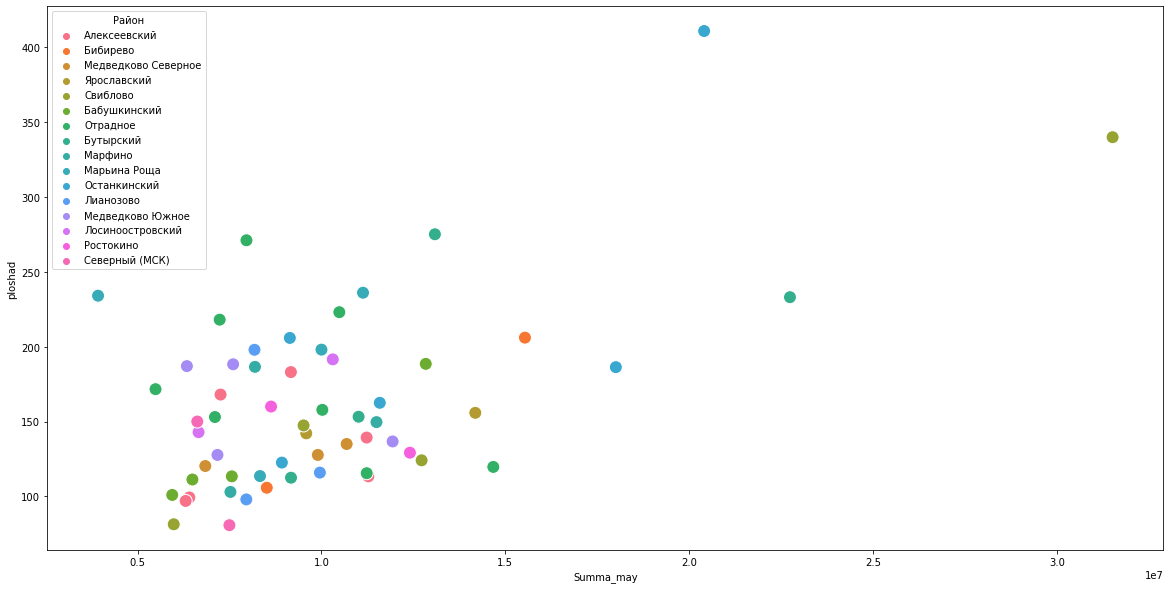

In [35]:
plt.figure(figsize=(20, 10))
sns.scatterplot(x='Summa_may', y='ploshad', hue='Район', data=df_shop_vv, s = 170)


<AxesSubplot:xlabel='Summa_may', ylabel='ploshad'>

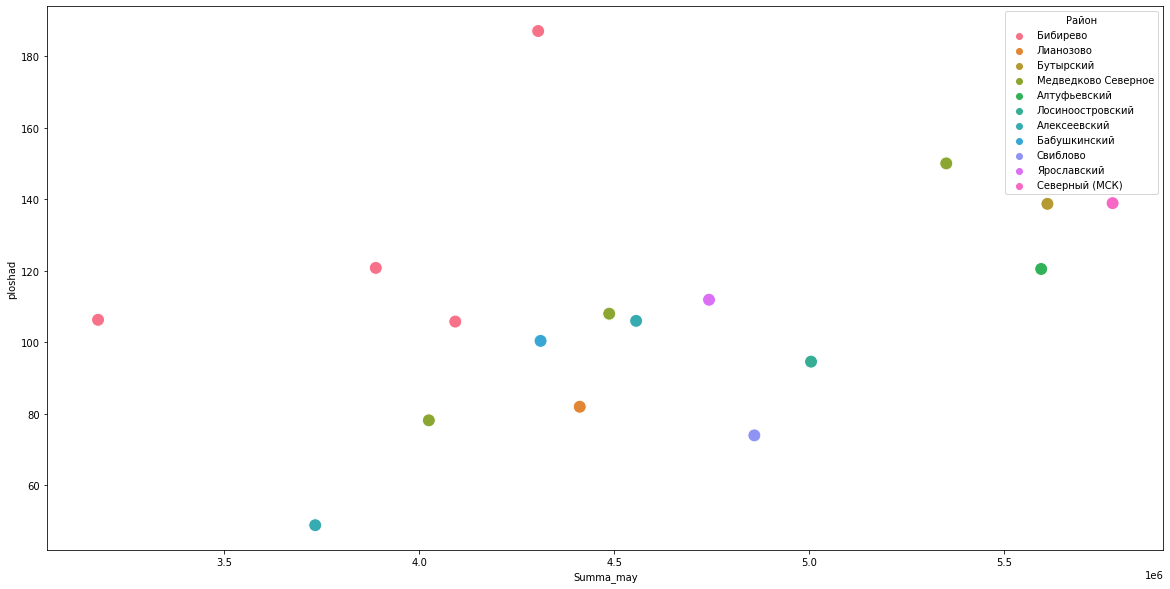

In [36]:
plt.figure(figsize=(20, 10))
sns.scatterplot(x='Summa_may', y='ploshad', hue='Район', data=df_shop_sh, s = 170)


In [37]:
df_shop_vv.to_csv(path_data + 'ВкусВил.csv', sep=';', index=False)
df_shop_sh.to_csv(path_data + 'Шмель.csv', sep=';', index=False)

In [38]:
writer_vv = pd.ExcelWriter('ВкусВилл свод.xlsx')  
df_shop_vv.to_excel(writer_vv)
writer_vv.save()

In [39]:
writer_sh = pd.ExcelWriter('Шмель свод.xlsx')  
df_shop_sh.to_excel(writer_sh)
writer_sh.save()